In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Adapted from code by Author: Robert Guthrie
from IPython.display import clear_output


import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [3]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    tensor = torch.LongTensor(idxs)
    return autograd.Variable(tensor)

def convert_output(input, to_idx):
    return

In [4]:
# training_data = [
#     ("Out of the mid-wood's twilight Into the meadow's dawn, Ivory limbed and brown-eyed, Flashes my Faun!".split()),
# ("He skips through the copses singing, And his shadow dances along, And I know not which I should follow, Shadow or song!".split()),
#     ("O Hunter, snare me his shadow! O Nightingale, catch me his strain! Else moonstruck with music and madness I track him in vain!".split())]
  
training_data = ['I am Daniel \n I am Sam \n Sam I am \n'.split(' '), 'That Sam-I-am \n That Sam-I-am ! \n I do not like \n That Sam-I-am \n'.split(' '), 'Do you like \n Green eggs and ham \n'.split(' '), 'I do not like them , \n Sam-I-am . \n I do not like \n Green eggs and ham . \n'.split(' '), 'Would you like them \n Here or there ? \n'.split(' '), 'I would not like them \n Here or there . \n I would not like them \n Anywhere . \n I do not like \n Green eggs and ham . \n I do not like them , \n Sam-I-am \n'.split(' '), 'Would you like them \n In a house ? \n Would you like them \n With a mouse ? \n'.split(' '), 'I do not like them \n In a house . \n I do not like them \n With a mouse . \n I do not like them \n Here or there . \n I do not like them \n Anywhere . \n I do not like green eggs and ham . \n I do not like them , Sam-I-am . \n'.split(' '), 'Would you eat them \n In a box ? \n Would you eat them \n With a fox ? \n'.split(' '), 'Not in a box . \n Not with a fox . \n Not in a house . \n Not with a mouse . \n I would not eat them here or there . \n I would not eat them anywhere . \n I would not eat green eggs and ham . \n I do not like them , Sam-I-am . \n'.split(' '), 'Would you ? Could you ? \n In a car ? \n Eat them ! Eat them ! \n Here they are . \n'.split(' '), 'I would not , \n Could not , \n In a car \n'.split(' '), 'You may like them . \n You will see . \n You may like them \n In a tree ? \n'.split(' '), 'I would not , could not in a tree . \n Not in a car ! You let me be . \n I do not like them in a box . \n I do not like them with a fox \n I do not like them in a house \n I do not like them with a mouse \n I do not like them here or there . \n I do not like them anywhere . \n I do not like green eggs and ham . \n I do not like them , Sam-I-am . \n'.split(' '), 'A train ! A train ! \n A train ! A train ! \n Could you , would you \n On a train ? \n'.split(' '), 'Not on a train ! Not in a tree ! \n Not in a car ! Sam ! Let me be ! \n I would not , could not , in a box . \n I could not , would not , with a fox . \n I will not eat them with a mouse \n I will not eat them in a house . \n I will not eat them here or there . \n I will not eat them anywhere . \n I do not like them , Sam-I-am . \n'.split(' '), 'Say ! \n In the dark ? \n Here in the dark ! \n Would you , could you , in the dark ? \n'.split(' '), 'I would not , could not , \n In the dark . \n'.split(' '), 'Would you , could you , \n In the rain ? \n'.split(' '), 'I would not , could not , in the rain . \n Not in the dark . \n Not on a train , \n Not in a car , Not in a tree . \n I do not like them , Sam , you see . \n Not in a house . Not in a box . \n Not with a mouse . Not with a fox . \n I will not eat them here or there . \n I do not like them anywhere ! \n'.split(' '), 'You do not like \n Green eggs and ham ? \n'.split(' '), 'I do not \n Like them , \n Sam-I-am . \n'.split(' '), 'Could you , would you , \n With a goat ? \n'.split(' '), 'I would not , \n Could not . \n With a goat ! \n'.split(' '), 'Would you , could you , \n On a boat ? \n'.split(' '), 'I could not , would not , on a boat . \n I will not , will not , with a goat . \n I will not eat them in the rain . \n I will not eat them on a train . \n Not in the dark ! \n Not in a tree ! \n Not in a car ! You let me be ! \n I do not like them in a box . \n I do not like them with a fox . \n I will not eat them in a house . \n I do not like them with a mouse . \n I do not like them here or there . \n I do not like them anywhere ! \n'.split(' '), 'I do not like \n Green eggs \n And ham ! \n'.split(' '), 'I do not like them , \n Sam-I-am . \n'.split(' '), 'You do not like them . \n So you say . \n Try them ! Try them ! \n And you may . \n Try them and you may I say . \n'.split(' '), 'Sam ! \n If you will let me be , \n I will try them . \n You will see . \n'.split(' '), 'Say ! \n I like green eggs and ham ! \n I do ! I like them , Sam-I-am ! \n And I would eat them in a boat ! \n And I would eat them with a goat ... \n And I will eat them in the rain . \n And in the dark \n And on a train . \n And in a car . \n And in a tree . \n They are so good so good you see ! \n'.split(' '), 'So I will eat them in a box . \n And I will eat them with a fox . \n And I will eat them in a house . \n And I will eat them with a mouse . \n And I will eat them here and there . \n Say ! I will eat them anywhere ! \n'.split(' '), 'I do so like \n Green eggs and ham ! \n Thank you ! \n Thank you , \n Sam-I-am'.split(' ')]
    
    
    
# print(training_data)

#Create Indexes for each word
word_to_ix = {}
for sentences in training_data:
    for word in sentences:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
ix_to_word = dict([(y, x) for (y, x) in enumerate(word_to_ix)])
print("Dictionary Len:",len(word_to_ix))

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

Dictionary Len: 78


In [5]:
#Class creation
class LSTMPoem(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMPoem, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (autograd.Variable(torch.zeros(1, 1, self.hidden_dim)),
                autograd.Variable(torch.zeros(1, 1, self.hidden_dim)))

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, self.hidden = self.lstm(
            embeds.view(len(sentence), 1, -1), self.hidden)
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [6]:
model = LSTMPoem(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(word_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
inputs = prepare_sequence(training_data[0], word_to_ix)
# print(inputs)

loss_save = []

for epoch in range(2000):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Also, we need to clear out the hidden state of the LSTM,
        # detaching it from its history on the last instance.
        model.hidden = model.init_hidden()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Variables of word indices.
        sentence_in = prepare_sequence(sentence[0:-1], word_to_ix)
        targets = prepare_sequence(sentence[1::], word_to_ix)

        # Step 3. Run our forward pass.
        prediction = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(prediction, targets)
        loss.backward()
        optimizer.step()
        
    loss_save.append(loss.data)

    if epoch%100 == 0: 
        clear_output()
        print("Epoch: ", epoch)

# See what the scores are after training
inputs = prepare_sequence(training_data[0], word_to_ix)
output = model(inputs)
# The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
#  for word i. The predicted tag is the maximum scoring tag.
# Here, we can see the predicted sequence below is 0 1 2 0 1
# since 0 is index of the maximum value of row 1,
# 1 is the index of maximum value of row 2, etc.
# Which is DET NOUN VERB DET NOUN, the correct sequence!
# print(output)

Epoch:  1900


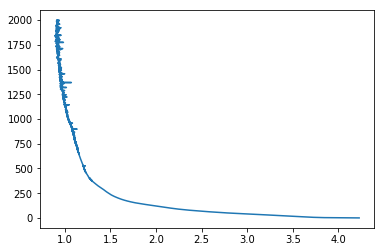

In [7]:
# print(loss_save)

# print(np.arange(0,len(loss_save)))

plt.plot(loss_save, np.arange(0,len(loss_save)))



In [25]:
text = "Would you eat them \n With a fox ? \n"
print(text)

test_seq = [text.split(' ')]
  

inputs = prepare_sequence(test_seq[0], word_to_ix)

for i in range(1,10):
    output = model(inputs)

    _, indices = output.max(1)

    indices = indices.data.numpy()

    print("\n")

    sentence = " "
    for i in indices:
        sentence = sentence + ix_to_word[i] + " "
    print(sentence)

    inputs = autograd.Variable(torch.from_numpy(indices))

Would you eat them 
 With a fox ? 



 you like them 
 and a goat . 
 I 


 will them . In not goat 
 
 I do 


 not you 
 a . 
 In In do not 


 like 
 In mouse ham I eggs a I . 


 them Green not I 
 will 
 will do I 


 . or . do Sam-I-am 
 In in not do 


 I not 
 in ! I eggs a . not 


 like 
 With a . may 
 mouse ham ! 


 them Green not are ham . In I 
 
 


In [20]:
print(output.data)



Columns 0 to 7 
-12.3275 -17.2108 -17.3332 -24.7560 -21.4880 -14.0290 -23.8857 -19.9468
-10.8637 -14.0697  -6.7171  -7.7364  -9.9112 -15.3190  -8.3856  -8.6197
 -9.9866 -29.0834 -16.0870  -4.5366 -20.0627 -12.9711 -19.9976  -9.8210
 -9.4385 -14.5382  -5.2227  -0.5516  -7.7168 -18.4959 -12.1663  -6.1044
 -3.8543  -8.1117  -4.9169  -5.4623  -2.0584 -11.6409  -4.5103  -8.0479
 -7.2386 -13.1508 -17.5544 -25.1141 -17.3936 -11.6500 -29.4900 -13.8184
 -7.5329 -11.5568 -16.2786 -22.7537 -16.3261  -7.7401 -26.2139  -6.1446
 -7.4482 -23.2958 -16.2033 -12.7345 -18.4123 -11.4467 -26.9247  -5.2854
-15.2413 -26.9084 -14.2957  -0.0132 -17.2023 -17.3868 -16.3916  -4.4178
 -0.9692 -11.1948 -11.1044 -18.6664 -10.5488  -2.1628  -9.4897 -12.9048

Columns 8 to 15 
-10.1249  -2.5438 -11.9714 -16.8325  -0.0858 -15.8997 -14.3794 -28.7715
-11.9364 -15.8555  -0.3194 -15.3948  -8.0498 -18.0307 -17.7260 -15.9770
-31.2246 -14.6222 -27.9113 -18.2094  -5.7867 -11.4419 -22.7525 -17.5006
-16.5425 -11.9489  -9.0351 -